In [1]:
import os
import tensorflow as tf
import numpy as np

In [2]:
DATASET_PATH = "Vehicle"
images = []
classes =[]
class_list = []

target_size = (250,250)

In [3]:
for i, classname in enumerate(os.listdir(DATASET_PATH)):
    class_list.append(classname)
    for j, filename in enumerate(os.listdir(os.path.join(DATASET_PATH, classname))):
        image = tf.keras.utils.load_img(os.path.join(DATASET_PATH, classname, filename), color_mode = "grayscale", target_size = target_size)
        image = tf.keras.utils.img_to_array(image)
        image /= 255
        images.append(image)
        classes.append(i)

In [5]:
images = np.array(images)
classes = np.array(classes)

In [7]:
y = tf.keras.utils.to_categorical(classes, num_classes = len(class_list))
y.shape

(3000, 3)

# Model

In [8]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
x_train, x_temp, y_train, y_temp = train_test_split(images, y, train_size=0.8)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, train_size=0.5)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu",  input_shape = (x_train[0].shape)),
    tf.keras.layers.Conv2D(32, kernel_size = (5, 5), strides = (2, 2), padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dropout(rate = 0.2),
    tf.keras.layers.Dense(len(class_list), activation = "softmax")
])

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 255, 255, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     8,388,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,440,739 (32.20 MB)

 Trainable params: 8,440,739 (32.20 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, batch_size = 50)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.3861 - loss: 1.7004 - val_accuracy: 0.6433 - val_loss: 0.8578
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6682 - loss: 0.8185 - val_accuracy: 0.7333 - val_loss: 0.7024
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7331 - loss: 0.6401 - val_accuracy: 0.7167 - val_loss: 0.6605
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7452 - loss: 0.6038 - val_accuracy: 0.7433 - val_loss: 0.6180
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.8009 - loss: 0.5092 - val_accuracy: 0.7733 - val_loss: 0.5793
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.8608 - loss: 0.3992 - val_accuracy: 0.8167 - val_loss: 0.4955
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9189 - loss: 0.2463 - val_accuracy: 0.8100 - val_loss: 0.4788
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.9411 - loss: 0.1996 - val_accuracy: 0.8100 - val_los

In [23]:
for i in range(20):
    img = np.expand_dims(x_test[i], axis = 0)
    pred = model.predict(img)
    
    print(f"Sample {i}: Actual Label = {class_list[np.argmax(y_test[i])]}, Predicted Label = {class_list[np.argmax(pred)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
Sample 0: Actual Label = airplanes, Predicted Label = airplanes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Sample 1: Actual Label = ship, Predicted Label = ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Sample 2: Actual Label = cars, Predicted Label = cars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Sample 3: Actual Label = cars, Predicted Label = cars
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Sample 4: Actual Label = ship, Predicted Label = ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Sample 5: Actual Label = airplanes, Predicted Label = airplanes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Sample 6: Actual Label = airplanes, Predicted Label = ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Sample 7: Actual Label = airplanes, Predicted Label = airplanes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Sample 8: Actual Label = airplanes, Predicted Label = airplanes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Sample 9: Actual Label = airplanes, Predicted Label = airplanes
1/1 ━━━━━━━━━━━━━━━━━━━━

In [24]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 1)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.8564 - loss: 0.4430
Loss: 0.40544572472572327
Accuracy: 0.8666666746139526


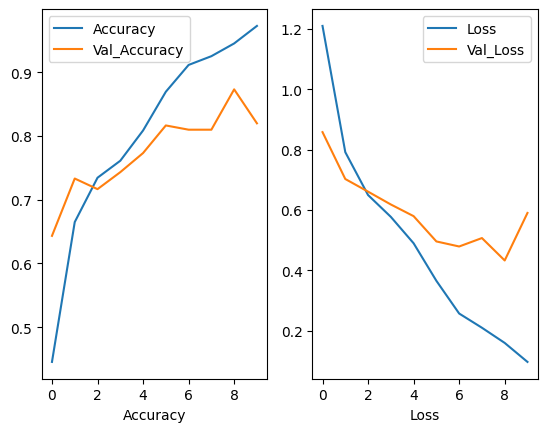

In [25]:
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend(['Accuracy', "Val_Accuracy"])

plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend(['Loss', "Val_Loss"])

plt.show()